# Sobel Filter


In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

2023-09-12 16:15:24.345638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 16:15:25.033014: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-09-12 16:15:25.033072: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-09-12 16:15:25.033078: W tensorflow/compiler/tf2tensorrt/utils/py_utils

## Loading image in grayscale

(480, 640)

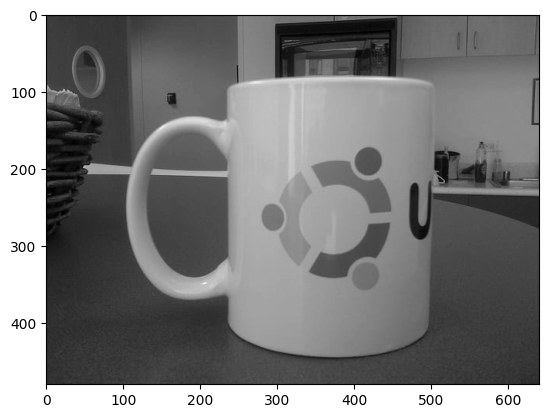

In [2]:
#image_bytes = tf.io.read_file("mug.jpg")
#mugGray = tf.image.decode_image(image_bytes,channels=1)
mugGray = cv2.imread('mug.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(mugGray, cmap='gray')
testImageHeight  = mugGray.shape[0]
testImageWidth = mugGray.shape[1]
imageNChannels = 1
mugGray.shape

## Make horizontal and vertical sobel filters

In [9]:
# Sobel operator for horizontal edge detection
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
# Sobel operator for vertical edge detection
Ky = Kx.T

<AxesSubplot: >

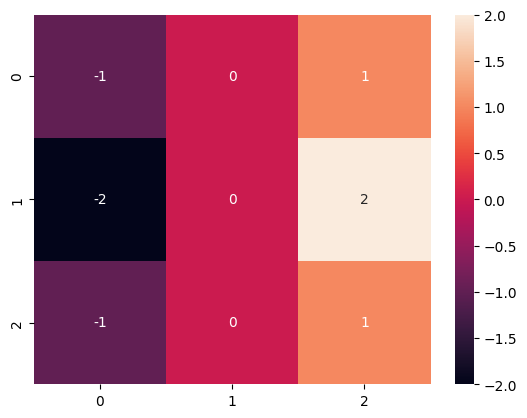

In [10]:
sns.heatmap(Kx,annot=True)


<AxesSubplot: >

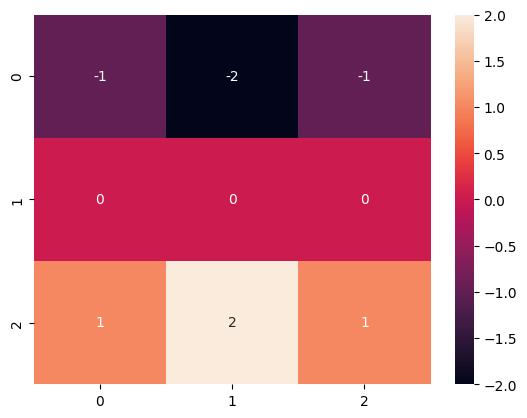

In [11]:
sns.heatmap(Ky,annot=True)

## Apply Filters (no padding)

In [12]:
# Without using padding, the output array is 2 pixels shorter on each dimension
# output size calculated using the formula [(W−K+2P)/S]+1  
convolvedShape = (testImageHeight - 2, testImageWidth - 2)
mugEdgesx = np.zeros(convolvedShape) # Horizontal
mugEdgesy = np.zeros(convolvedShape) # Vertical
mugEdges  = np.zeros(convolvedShape) # Combined

In [13]:
for i in range(1, testImageHeight-1):
    for j in range(1, testImageWidth-1):
        window = mugGray[i-1:i+2, j-1:j+2]
        a = mugEdgesx[i-1, j-1] = np.maximum(np.sum(np.multiply(window, Kx)), 0)
        b = mugEdgesy[i-1, j-1] = np.maximum(np.sum(np.multiply(window, Ky)), 0)
        mugEdges[i-1, j-1]      = np.sqrt(a**2 + b**2)

## Visualize Results

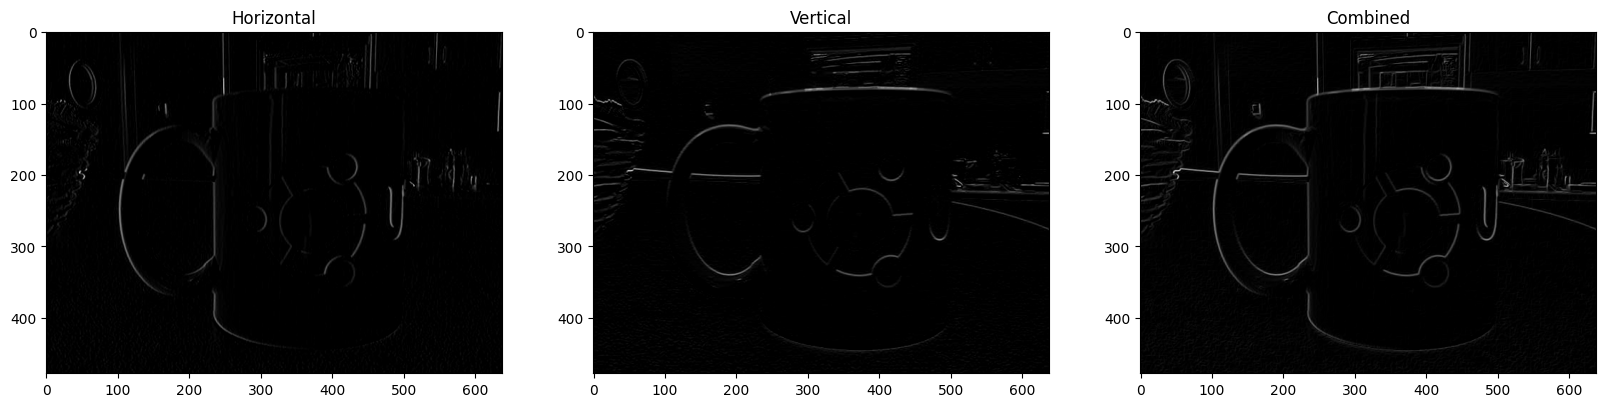

In [14]:
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
plt.imshow(mugEdgesx, cmap='gray');
plt.title('Horizontal')
plt.subplot(1, 3, 2)
plt.imshow(mugEdgesy, cmap='gray');
plt.title('Vertical')
plt.subplot(1, 3, 3)
plt.imshow(mugEdges, cmap='gray');
plt.title('Combined');